# Dataset Analysis

### We create a pipeline to prepare the dataset for the Machine Learning Model.

In [21]:
import pandas as pd

# Load the dataset
df = pd.read_csv('car_price_dataset.csv')
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [22]:
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [23]:
df['Brand'].value_counts()

Brand
Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: count, dtype: int64

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# I define numerical and categorical features
numerical_features = ['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count']
categorical_features_onehot = ['Brand', 'Model', 'Fuel_Type']
categorical_features_ordinal = ['Transmission']

# Define transformers
numerical_transformer = StandardScaler()
categorical_transformer_onehot = OneHotEncoder(handle_unknown='ignore')
categorical_transformer_ordinal = OrdinalEncoder(categories=[['Manual', 'Semi-Automatic', 'Automatic']])

# Combine the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat_onehot', categorical_transformer_onehot, categorical_features_onehot),
        ('cat_ordinal', categorical_transformer_ordinal, categorical_features_ordinal)
    ]
)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X = df.drop(columns='Price')
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# This hyperparameters were tuned using GridSearchCV.
best_rf_model = RandomForestRegressor(
    max_depth=20,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=150,
    random_state=42
)

# Create a pipeline with the preprocessor and the model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', pipeline.named_steps['preprocessor']),
    ('model', best_rf_model)
])

# Fit the pipeline on the training data
rf_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_pipeline.predict(X_test)

# Calculate RMSE and R-squared
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Display the results
print("Random Forest Test Results:")
print(f"RMSE: {rmse_rf}") #Root Mean Squared Error
print(f"R-squared: {r2_rf}")


Random Forest Test Results:
RMSE: 322.7411226165383
R-squared: 0.9886630425238512


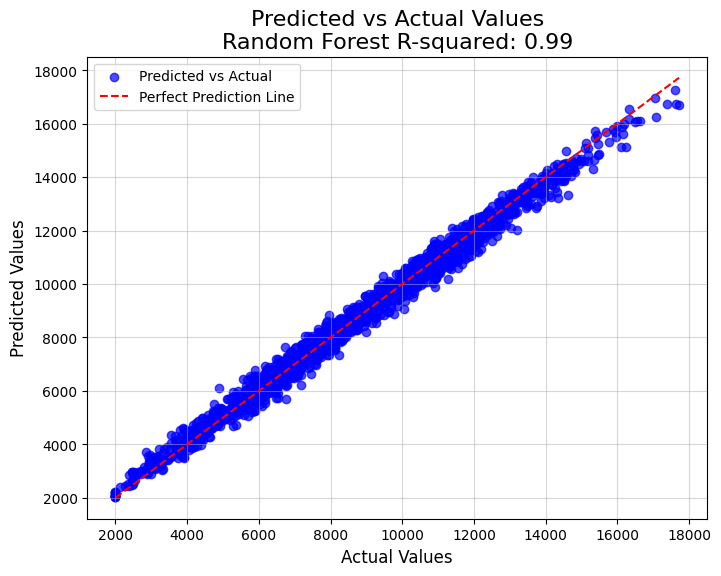

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Calculate R-squared
r2_rf = r2_score(y_test, y_pred_rf)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction Line')
plt.title(f'Predicted vs Actual Values\nRandom Forest R-squared: {r2_rf:.2f}', fontsize=16)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()
